In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.python.keras.backend import set_session
from tensorflow.python.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
sess = tf.InteractiveSession()
model = keras.models.load_model('InceptionV3_87acc_80ep_32cl.hdf5')

W0630 19:21:24.071331 139738518628224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0630 19:21:24.072935 139738518628224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0630 19:21:24.074474 139738518628224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

In [0]:
#Preprocess image, calling the predic method, find the winner class and match with lable
def predict_class(model, image, show_debug = False):
    img = np.expand_dims(image, axis=0)
    img = img / 255  
    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    fill_dict(pred_value)
    if show_debug:
      plt.imshow(img[0])                           
      plt.axis('off')
      plt.title(pred_value)
      plt.show()

In [0]:
#Fill the dictionary with lables
def fill_dict(key):
  if key in classes:
    classes[key] += 1
  else:
    classes[key] = 1

In [0]:
# Find the winner lables
def winner():
  winners = []
  for k,v in classes.items():
    if v > 0:
      winners.append(k)
  return winners
      #print("On the plate is " + k)

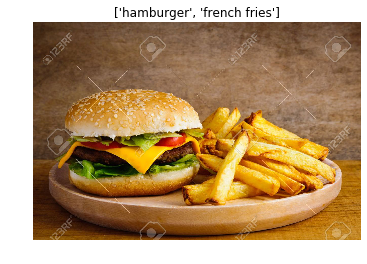

CPU times: user 5.18 s, sys: 166 ms, total: 5.34 s
Wall time: 4.45 s


In [9]:
#Getting patches from the initial image
%%time
classes = {}
image_file = 'hm_fr.jpg'
im = Image.open(image_file)
img_raw = tf.read_file(image_file)

food_list = ['apple pie','baby back ribs','bread pudding','breakfast burrito','caesar salad','chicken curry','chicken wings','club sandwich','cup cakes','dumplings','eggs benedict','filet mignon','fish and chips','french fries','french toast','greek salad','grilled cheese sandwich','grilled salmon','hamburger','hot dog','ice cream','macaroni and cheese','macarons','omelette','pancakes','pizza','pork chop','prime rib','risotto','spaghetti bolognese','spaghetti carbonara','steak']

image = tf.image.decode_image(img_raw)
sliding = sess.run(tf.shape(image))

ksize_rows, ksize_cols = int(sliding[0] // 2), int(sliding[1] // 2)
strides_rows, strides_cols = ksize_rows // 2, ksize_cols // 2

#print(ksize_rows, ksize_cols, strides_rows, strides_cols)

ksizes = [1, ksize_rows, ksize_cols, 1] # The size of sliding window

strides = [1, strides_rows, strides_cols, 1]# How far the centers of 2 consecutive patches are in the image

rates = [1, 1, 1, 1] # sample pixel consecutively

padding='VALID' # or 'SAME'

image_expanded = tf.expand_dims(image, 0)
image_patches = tf.extract_image_patches(image_expanded, ksizes, strides, rates, padding)

shapes = sess.run(tf.shape(image_patches))
nr, nc = shapes[1], shapes[2]
#fig = plt.figure()
#gs = gridspec.GridSpec(nr, nc)
#gs.update(wspace=0.01, hspace=0.01)

for i in range(nr):
  for j in range(nc):
    x = sess.run(tf.reshape(image_patches[0,i,j,], [ksize_rows, ksize_cols, 3]))
    x = cv2.resize(x, dsize=(300, 300), interpolation=cv2.INTER_CUBIC)
    predict_class(model, x)
    #print(t)
    #print(t.shape)
    #ax = plt.subplot(gs[i*nc+j])
    #plt.axis('off')
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    #ax.set_aspect('auto')
    #plt.imshow(x)
    #sess.close()
#print(classes)
plt.imshow(im)                           
plt.axis('off')
plt.title(winner())
plt.show()